In [1]:
# Ensure required packages are installed in this kernel
%pip install -q scikit-learn seaborn matplotlib pandas numpy
import sys, sklearn, seaborn, matplotlib, pandas as pd, numpy as np
print('Python:', sys.executable)
print('sklearn:', sklearn.__version__)
print('seaborn:', seaborn.__version__)
print('matplotlib:', matplotlib.__version__)


Note: you may need to restart the kernel to use updated packages.
Python: c:\ProgramData\anaconda3\python.exe
sklearn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\AI workforce\ML-flow\garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
df.shape

(1197, 15)

In [7]:
df.fillna(df['wip'].mean(),inplace=True)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['department']=encoder.fit_transform(df['department'])
df['quarter']=encoder.fit_transform(df['quarter'])
df['day']=encoder.fit_transform(df['day'])
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,2,3,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,1,3,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,2,3,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,2,3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,2,3,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,5,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,0,5,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,0,5,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,0,5,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [9]:
skewness = df.drop(columns=['date']).skew(numeric_only=True)
print(skewness)

quarter                   0.386482
department               -0.766062
day                      -0.029637
team                      0.009848
targeted_productivity    -2.144150
smv                       0.405937
wip                      12.809939
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.111740
actual_productivity      -0.807492
dtype: float64


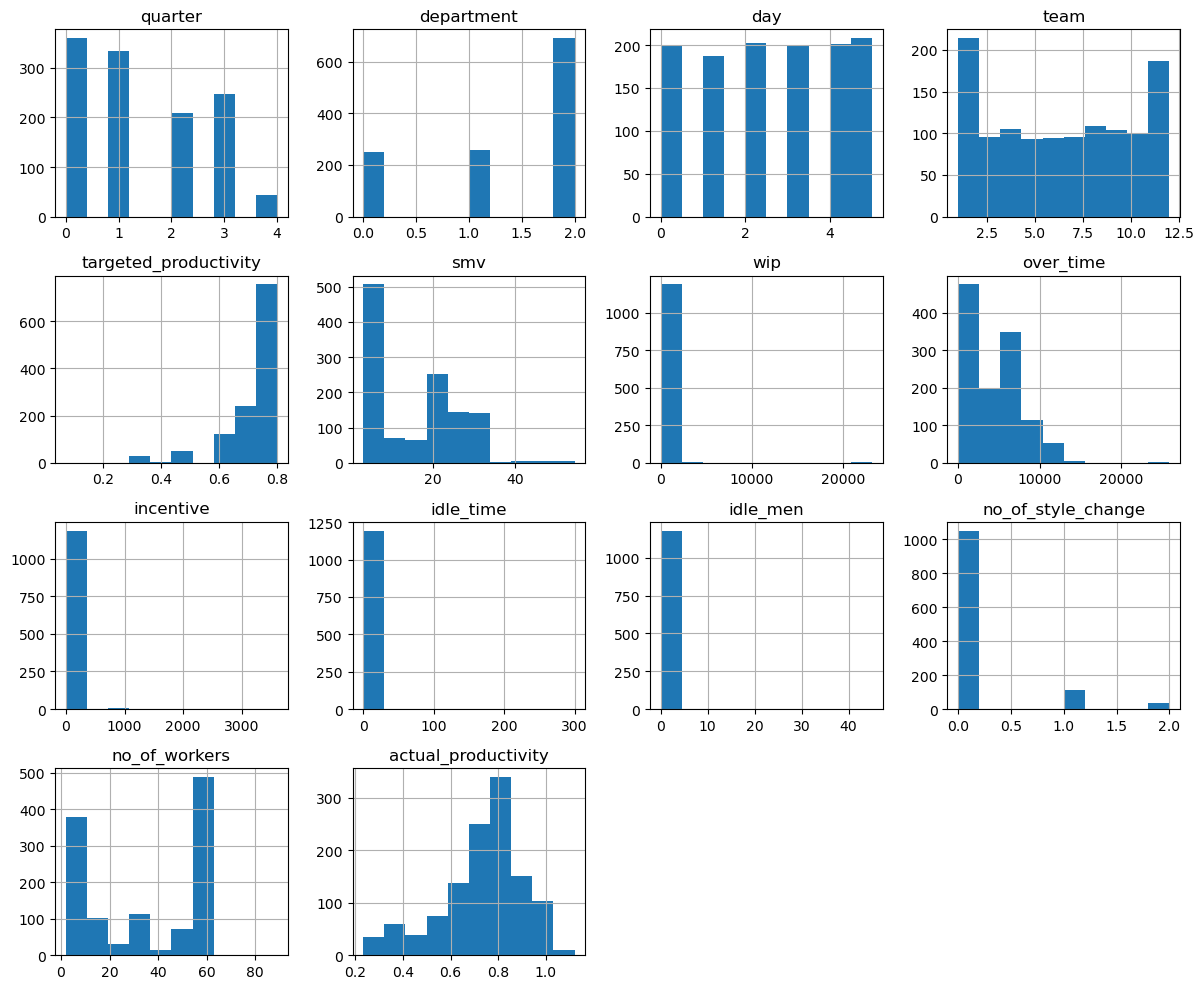

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
import pandas as pd

skewed_cols = ['targeted_productivity','wip','idle_time','incentive','idle_men','no_of_style_change']

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

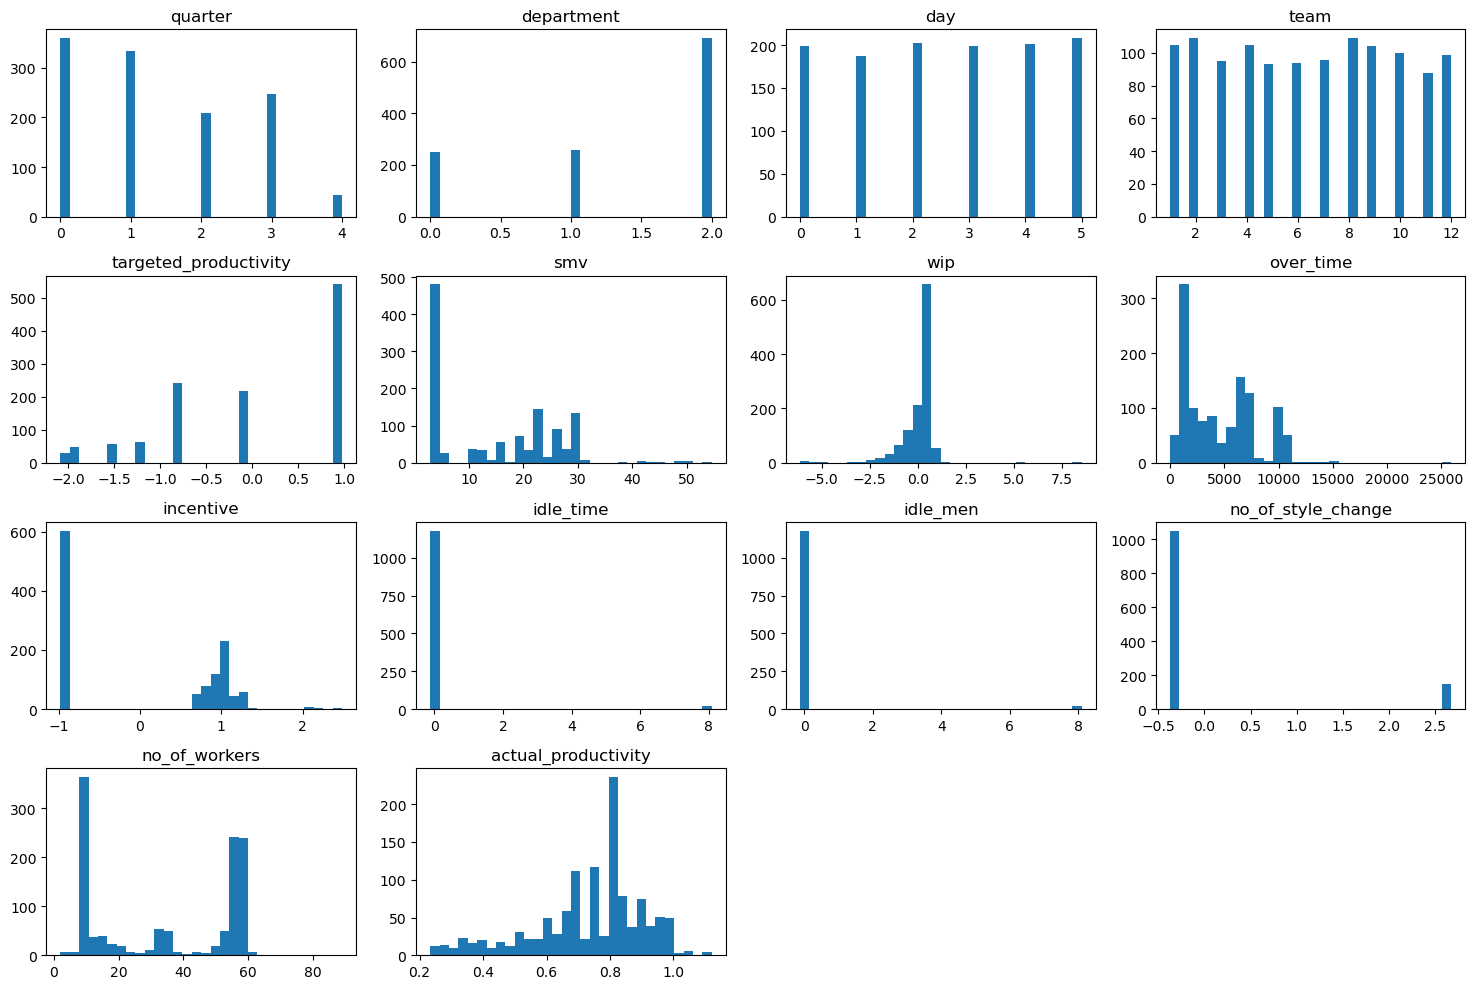

In [12]:
df.hist(bins=30, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

In [13]:
skewness = df.drop(columns=['date']).skew(numeric_only=True)
print(skewness)

quarter                  0.386482
department              -0.766062
day                     -0.029637
team                     0.009848
targeted_productivity   -0.448182
smv                      0.405937
wip                      0.865865
over_time                0.673287
incentive                0.106228
idle_time                7.979650
idle_men                 7.979650
no_of_style_change       2.301332
no_of_workers           -0.111740
actual_productivity     -0.807492
dtype: float64


In [14]:
df.to_csv('modified_data.csv', index=False) 